### Project description

The project is for big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

## Table of contents

### Part 1. Prioritizing Hypotheses

- [Opening data](#start)
- [Preprocessing data](#preprocessing)
- [Apply the ICE framework to prioritize hypotheses](#ice)
- [Apply the RICE framework to prioritize hypotheses](#rice)
- [Show how the prioritization of hypotheses changes when you use RICE instead of ICE](#change)
- [Explanation for the changes](#explanation)

### Part 2. A/B Test Analysis

**Analyze the A/B test:**

1. [Graph cumulative revenue by group. Make conclusions and conjectures.](#rev)
2. [Graph cumulative average order size by group. Make conclusions and conjectures.](#order)
3. [Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.](#diff)
4. [Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.](#cr)
5. [Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.](#scatter1)
6. [Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.](#perc1)
7. [Plot a scatter chart of order prices. Make conclusions and conjectures.](#scatter2)
8. [Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly](#perc2)
9. [Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.](#stat1)
10. [Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.](#stat2)
11. [Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.](#stat3)
12. [Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.](#stat4)
13. [Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.](#conclusion)

## Part 1. Prioritizing Hypotheses

**Step 1. Download the data and prepare it for analysis**

Import libraries

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from pandas.core.reshape.concat import concat

<a id="start"></a>

Import files

In [5]:
# hypotheses = pd.read_csv('C:/Users/anna/Desktop/Y-data/Project7 Making Business Decisions/hypotheses_us.csv')
# visits = pd.read_csv('C:/Users/anna/Desktop/Y-data/Project7 Making Business Decisions/visits_us.csv')
# orders = pd.read_csv('C:/Users/anna/Desktop/Y-data/Project7 Making Business Decisions/orders_us.csv')

hypotheses = pd.read_csv('/datasets/hypotheses_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')
orders = pd.read_csv('/datasets/orders_us.csv')

In [6]:
# Print the table
hypotheses.head(5)

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...


In [9]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [10]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Effort        9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [11]:
hypotheses.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [12]:
pd.set_option('display.max_colwidth', -1)

In [13]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


In [14]:
# Print the table
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [58]:
 visits.describe(include='object')

,group
count,62
unique,2
top,B
freq,31


In [17]:
# Print the table
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [19]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [20]:
 orders.describe(include='object')

,date,group
count,1197,1197
unique,31,2
top,2019-08-05,B
freq,48,640


<a id="preprocessing"></a>

**Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B**

In [21]:
#checking the users that got into 2 groups

user_group = orders.groupby('visitorId').agg({'group': 'nunique'}).sort_values(by='group', ascending=False)
user_group.head(5)

,group
visitorId,
2654030115,2
3891541246,2
3941795274,2
1404934699,2
351125977,2


In [22]:
#creating a new slice with users, which got only in 1 group
user_1 = user_group.query('group <= 1')

In [23]:
#creating dataset with users, which are presented only in 1 group
orders = orders[orders['visitorId'].isin(user_1.index)]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [24]:
orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

In [25]:
group_A = orders[orders['group'] == "A"]
group_B = orders[orders['group'] == "B"]

Text(0, 0.5, 'Density')

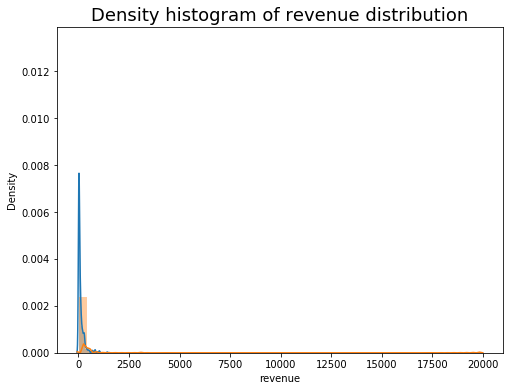

In [26]:
plt.figure(figsize=(8,6))
sns.distplot(group_A['revenue'], label="revenue")
sns.distplot(group_B['revenue'], label="revenue")
plt.title("Density histogram of revenue distribution", fontsize=18)
plt.ylabel('Density', fontsize=10)

I received cleaned amounts of A and B group. I'll keep the group sizes the same, as they're pretty large and distributions more or less the same.

<a id="ice"></a>

**Apply the ICE framework to prioritize hypotheses**

In [27]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

In [28]:
hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


<a id="rice"></a>

**Apply the RICE framework to prioritize hypotheses**

In [29]:
hypotheses['RICE'] = (hypotheses['Impact'] * hypotheses['Confidence'] * hypotheses['Reach']) / hypotheses['Effort']

In [30]:
hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


<a id="change"></a>

**Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes**

In [31]:
hypotheses[['Hypothesis','ICE', 'RICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE,RICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000,56.0
1,Launch your own delivery service. This will shorten delivery time,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,1.333333,4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,1.000000,3.0


<a id="explanation"></a>

> **Conclusions:**

RICE has four components:

Reach — how many users will be affected by the update you want to introduce

Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product

Confidence — how sure you are that your product will affect them in this way

Effort — how much will it cost to test the hypothesis


ICE has 3 components:

Impact, confidence, effort/ease.

Because RICE considers additionally how many users the changes will affect, it has a different priority than ICE.

As we can see, in the top 3 priority for both methods got hypotheses 0 and 7, but if for ICE method the 8th hypothesis appeared on the 1st place, for RICE method if received only 5th place, because of the low relatively to others hypotheses number of affected users.


## Part 2. A/B Test Analysis

**1. Graph cumulative revenue by group. Make conclusions and conjectures.**

**2. Graph cumulative average order size by group. Make conclusions and conjectures.**

**3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.**

First, I will convert date columns into appropriate format

In [32]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null float64
group            1016 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [33]:
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null datetime64[ns]
group     62 non-null object
visits    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Next, I will make new data frame named "cumulativeData" with the following columns: date, group, orders, buyers, revenue, visitors.

I'll also drop duplicates to build an array with unique paired date-group values.

In [34]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [35]:
ordersAggregated = datesGroups \
.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])] \
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1) \
.sort_values(by=['date','group'])

In [36]:
visitsAggregated = datesGroups \
.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])] \
.agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1) \
.sort_values(by=['date','group']) 

 Now I will merge these two tables.

In [37]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


<a id="rev"></a>

Now I'll plot the graphs.

First - cumulative revenue.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



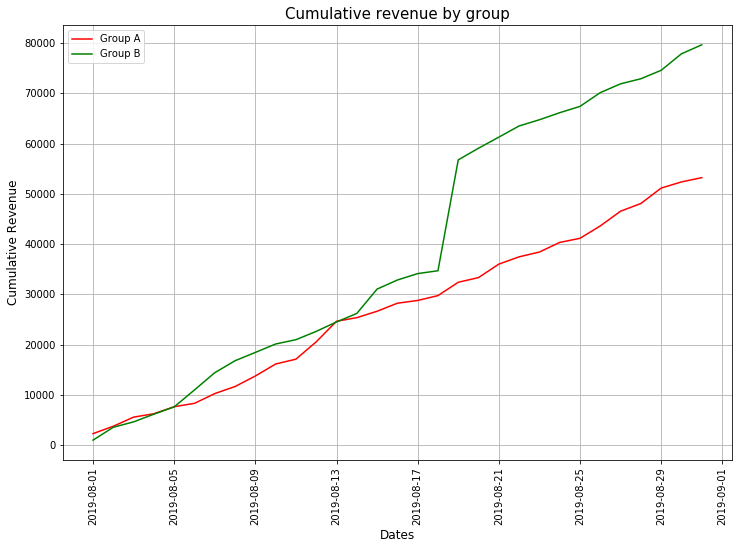

In [38]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]


cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,8)) 
plt.xticks(rotation=90) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Group A', color='red'); 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Group B', color='green');
plt.title('Cumulative revenue by group',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Cumulative Revenue',fontdict={'size':12})
plt.grid(True)

plt.legend();

> Conclusion: 
revenue is rising steadily throughout the whole test, both groups have similar dynamics.
But group B shows peak after 2019-08-17 and revenue in group B increases more than in group A.

<a id="order"></a>

Next I'll plot cumulative average order size by group.

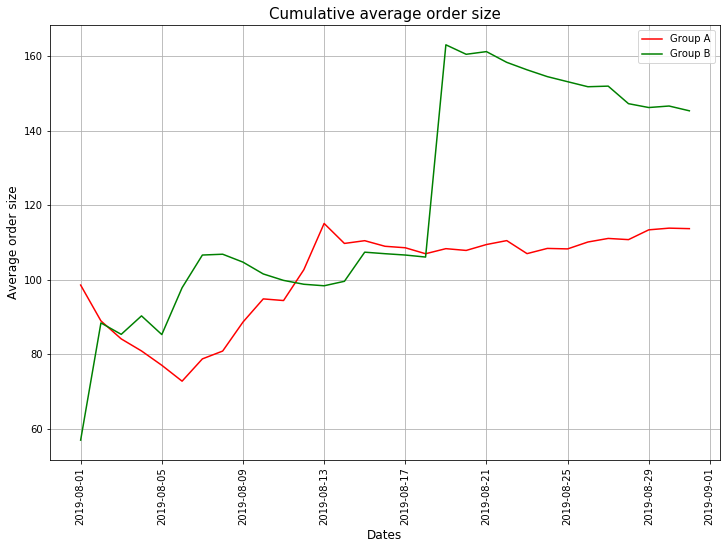

In [39]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Group A', color='red')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Group B', color='green')

plt.title('Cumulative average order size',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Average order size',fontdict={'size':12})
plt.grid(True)

plt.legend();

> **Conclusion:**

>from the graph I can make conclusions that average order size is rising in the both groups, the group B
has spike in 2019-08-17 and after it the trend tends to fall.

<div class="alert alert-block alert-success">
<b>Success:</b> Nice visualization and conclusion</div>

<a id="diff"></a>

Finally, I'll graph the relative difference in cumulative average order size for group B compared with group A.

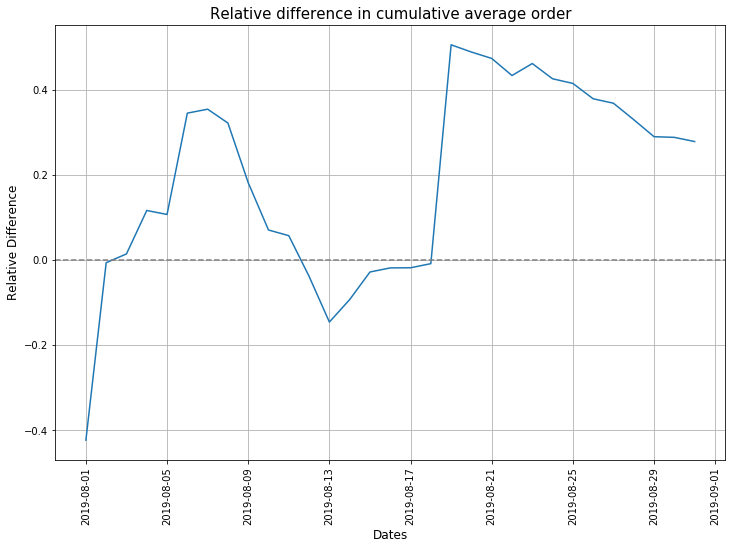

In [40]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,8))
plt.xticks(rotation=90) 

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Relative difference in cumulative average order',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Relative Difference',fontdict={'size':12})
plt.grid(True)

plt.axhline(y=0, color='gray', linestyle='--');

> Conclusion: the trend has spikes and falls. The reason for this could be some big orders or outliers.

<a id="cr"></a>

**4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference.**

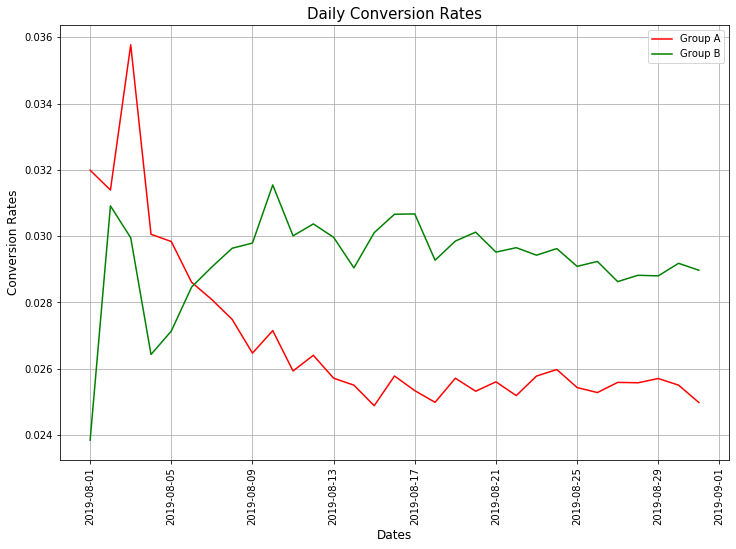

In [41]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']


cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,8))
plt.xticks(rotation=90) 
plt.title('Daily Conversion Rates',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Conversion Rates',fontdict={'size':12})
plt.grid(True)

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Group A', color='red')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Group B', color='green')
plt.legend();

**Plot a relative difference graph for the cumulative conversion rates**

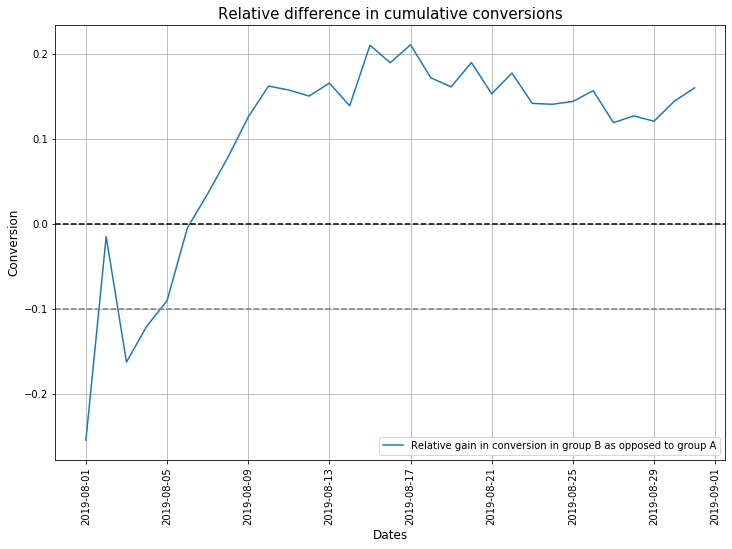

In [42]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']] \
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12,8))
plt.xticks(rotation=90) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.title('Relative difference in cumulative conversions',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Conversion',fontdict={'size':12})
plt.grid(True)

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.1, color='grey', linestyle='--');

> **Conclusions:**
At the beginning both groups A and B were volatile, but at the end trend for group A started to decrease, reaching 25% and trend for group B stabilized on the mark around 28% of conversion rate.

<a id="scatter1"></a>

**5. Plot a scatter chart of the number of orders per user.**

To get the results I'll create the dataframe with two columns: visitorId and orders.

In [43]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Now I'll plot a scatter chart of orders per users.

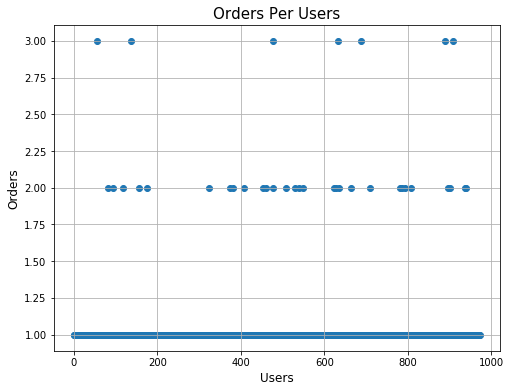

In [44]:
values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(8,6))
plt.title('Orders Per Users',fontdict={'size':15})
plt.xlabel('Users',fontdict={'size':12})
plt.ylabel('Orders',fontdict={'size':12})
plt.grid(True)
plt.scatter(values,ordersByUsers['orders']);

> **Conclusion:** the plot shows that the most of the users made 1 order. The smaller group made 2 orders and very few users made 3 orders.

<a id="perc1"></a>

**6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [45]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


> **Conclusion:** no more that 5% of users made > than 1 orders and not more than 1% of users made > than 2 orders.
Which means -> everything more than 1 order is abnormal.

<a id="scatter2"></a>

**7. Plot a scatter chart of order prices. Make conclusions and conjectures.**

In [46]:
orders.sort_values(by='revenue',ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A
949,1347999392,887908475,2019-08-21,930.0,A
940,2420050534,4003628586,2019-08-08,905.8,B
613,4071177889,3931967268,2019-08-07,830.3,B


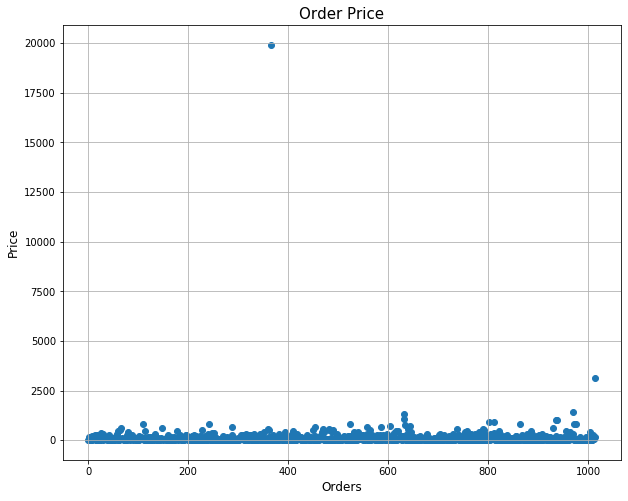

In [47]:
values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,8))
plt.title('Order Price',fontdict={'size':15})
plt.xlabel('Orders',fontdict={'size':12})
plt.ylabel('Price',fontdict={'size':12})
plt.grid(True)
plt.scatter(values,orders['revenue']);

> **Conclusion:** the scatter plot shows that most of the orders are less than 900 USD.
In outliers we have 1 order ~20K USD and 1 around 2500 USD.

<a id="perc2"></a>

**8. Calculate the 95th and 99th percentiles of order prices. Define the point at which data point becomes an anomaly.**

In [48]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[280.8   414.275 830.3  ]


- No more than 5% placed orders cost more than 414 USD. 

- No more than 1% placed orders have price more than 830 USD.

- Everything more than 414 USD should considered as abnormal.

<a id="stat1"></a>

**9. Find the statistical significance of the difference in conversion between the groups using the raw data.**

Let's calculate the statistical significance of the difference in conversion between the groups.

We'll create the variables ordersByUsersA and ordersByUsersB to store the columns ['visitorId', 'orders']. 

For users with at least 1 order, I'll indicate the number of orders made.

In [49]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

Now I'll declare the variables sampleA and sampleB, with users from different groups and corresponding numbers of orders.

Those users who didn't order anything will have 0.

- alpha=0.05

- H0="There is no significant difference in coversions between the groups"

- H1="There is significant difference in coversions between the groups"

In [50]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'] \
          .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits']
          .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) \

In [51]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.006
0.160


> **Conclusion:**
first value is P-value which is much smaller than 0.05 so we can reject null hypothesis that said: "There is no significant difference in coversions between the groups".

<a id="stat2"></a>

**10.Find the statistical significance of the difference in average order size between the groups using the raw data.**

- alpha = 0.05

- H0 = "There is no significant difference in average order size between the groups"

- H1 = "There is significant difference in average order size between the groups"

In [52]:
print("{0:.3f}" \
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.431
0.278


> **Conclusion:** the first p-value is bigger than 0.05, so we fail to reject the Null Hypothesis, but on the other side we do have relative difference of 0.278. It is a relative gain of 27.8%, so order size of group B is still larger by 27.8%

<a id="stat3"></a>

**11. Find the statistical significance of the difference in conversion between the groups using the filtered data.**

- alpha = 0.05

- H0 = "There is no significant difference in conversion between the groups using the filtered data"

- H1="There is significant difference in conversion between the groups using the filtered data"

I'll to determine anomalous users as all users who place more than 2 orders or make one order bigger than 950 USD.

In [53]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 950]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295 
33      249864742 
58      611059232 
744     888512513 
1103    1164614297
Name: visitorId, dtype: int64
(14,)


I got 14 anomal users in total.

Let's try to find out how their actions affected the test results. 

I'll calculate the statistical significance of the differences in conversion between the groups, using filtered data. 

Then I'll prepare samples of the number of orders per user for each test group.

In [54]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'] \
                  .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'] \
                  .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'] \
                 .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'] \
                 .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

 Let's apply the statistical Mann-Whitney criterion to the resulting samples.

In [55]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.004
0.189


> **Conclusion:** p-value is lower than alpha, so we are accepting H0.
There is no significant difference in conversion between the groups using the filtered data.

<a id="stat4"></a>

**12. Find the statistical significance of the difference in average order size between the groups using the filtered data.**

- alpha = 0.05

- H0 ="There is no significant difference in average order size between the groups using the filtered data"

- H1 ="There is significant difference in average order size between the groups using the filtered data"

In [56]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.407
-0.035


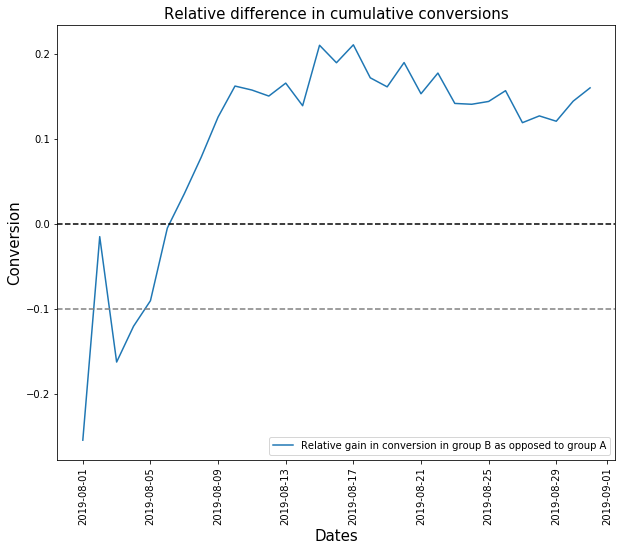

In [57]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,8))
plt.xticks(rotation=90) 
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()
plt.title('Relative difference in cumulative conversions',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':15})
plt.ylabel('Conversion',fontdict={'size':15})

plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=-0.1, color='grey', linestyle='--');

> **Conclusion:**
The p-value increased, but now the difference between the segments is 3.5% instead of 18%.
We are rejecting H0: "There is significant difference in average order size between the groups using the filtered data".

<a id="conclusion"></a>

**Make a decision based on the test results.**

The possible decisions are:
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

>Conclusions:
considering the given above analysis, I see that group is leading (on ~15%) in our A/B testing and its trend stabilized .
We can stop the test by saying that the B group is a winner.